# --------------------------------------------构建词表----------------------------------------------------

- ### 从标注数据中提取针对图片的描述作为源序列并构建词表
- ### 返回从标注文件中获取的标注，并由此组成的词汇表
- ### 输出vocab.plk文件，文件内容是每个词元对应的索引
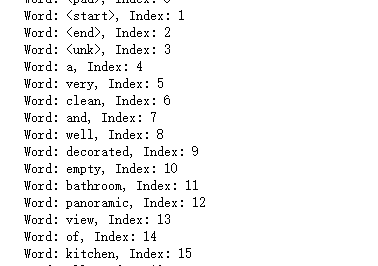

In [1]:
import nltk
import pickle
import argparse
from collections import Counter
from pycocotools.coco import COCO

In [2]:
"""创建词汇表对象"""
class Vocabulary(object):
    def __init__(self):
        self.word2idx = {} # 创建词元到索引的空字典
        self.idx2word = {} # 创建索引到词元的空字典
        self.idx = 0 # 初始化idx为0，用于跟踪添加到字典的词元的数量
    
    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word # 将词元及其索引储存到字典中
            self.idx += 1
    
    def __call__(self, word): # 类方法，使类的实例可以像函数一样被调用
        if not word in self.word2idx:  
            return self.word2idx['<unk>'] # 如果单词不在字典中，则返回'<unk>'未知类，
        return self.word2idx[word]   # 如果单词存在字典中则返回该单词对应的索引
    
    def __len__(self):  # 类方法，用于返回词汇表的大小
        return len(self.word2idx)

In [6]:
"""从JSON文件中提取图片描述的标注，并构建词汇表"""
def build_vocab(json, threshold):
    coco = COCO(json) # 使用COCO类加载给定的json文件
    counter = Counter() # 创建一个空的计数器，用于统计单词出现的频率
    ids = coco.anns.keys() # 获取json文件中的标注的唯一标识符列表，用于迭代处理每个标注文件
    for i, id in enumerate(ids):
        caption = str(coco.anns[id]['caption']) # 获取图像的标注字符，并转换成str格式
        tokens = nltk.tokenize.word_tokenize(caption.lower()) # 调用nltk对文本进行分词
        counter.update(tokens) # 将分词后的结果添加到计数器中，用于统计词元出现的频率
        
        if (i+1) % 1000 == 0:
            print("[{}/{}] Tokenized the captions.".format(i+1, len(ids))) # 打印分词进度
    
    words = [word for word, cnt in counter.items() if cnt >= threshold] # 筛选词元频率大于‘threshold’的单词，也就是词频太小的就去掉
    
    vocab = Vocabulary() # 调用上面创建的类，创建一个词汇表实例
    vocab.add_word('<pad>') # 添加一个特殊标记
    vocab.add_word('<start>')
    vocab.add_word('<end>')
    vocab.add_word('<unk>')
    
    for i, word in enumerate(words):
        vocab.add_word(word)
    return vocab

In [9]:
"""调用函数创建词表，注意此代码仅在本note中运行，不要调用"""
# vocab = build_vocab(json='data/annotations/captions_train2014.json', threshold=4)
# vocab_path = './data/vocab.pkl'
# with open(vocab_path, 'wb') as f:
#     pickle.dump(vocab, f)
# print("Total vocabulary size: {}".format(len(vocab)))
# print("Saved the vocabulary wrapper to '{}'".format(vocab_path))

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!
[1000/414113] Tokenized the captions.
[2000/414113] Tokenized the captions.
[3000/414113] Tokenized the captions.
[4000/414113] Tokenized the captions.
[5000/414113] Tokenized the captions.
[6000/414113] Tokenized the captions.
[7000/414113] Tokenized the captions.
[8000/414113] Tokenized the captions.
[9000/414113] Tokenized the captions.
[10000/414113] Tokenized the captions.
[11000/414113] Tokenized the captions.
[12000/414113] Tokenized the captions.
[13000/414113] Tokenized the captions.
[14000/414113] Tokenized the captions.
[15000/414113] Tokenized the captions.
[16000/414113] Tokenized the captions.
[17000/414113] Tokenized the captions.
[18000/414113] Tokenized the captions.
[19000/414113] Tokenized the captions.
[20000/414113] Tokenized the captions.
[21000/414113] Tokenized the captions.
[22000/414113] Tokenized the captions.
[23000/414113] Tokenized the captions.
[24000/414113] Tokenized the 

[210000/414113] Tokenized the captions.
[211000/414113] Tokenized the captions.
[212000/414113] Tokenized the captions.
[213000/414113] Tokenized the captions.
[214000/414113] Tokenized the captions.
[215000/414113] Tokenized the captions.
[216000/414113] Tokenized the captions.
[217000/414113] Tokenized the captions.
[218000/414113] Tokenized the captions.
[219000/414113] Tokenized the captions.
[220000/414113] Tokenized the captions.
[221000/414113] Tokenized the captions.
[222000/414113] Tokenized the captions.
[223000/414113] Tokenized the captions.
[224000/414113] Tokenized the captions.
[225000/414113] Tokenized the captions.
[226000/414113] Tokenized the captions.
[227000/414113] Tokenized the captions.
[228000/414113] Tokenized the captions.
[229000/414113] Tokenized the captions.
[230000/414113] Tokenized the captions.
[231000/414113] Tokenized the captions.
[232000/414113] Tokenized the captions.
[233000/414113] Tokenized the captions.
[234000/414113] Tokenized the captions.


In [ ]:
"""用于为外部运行所需要的函数"""

def main(args):
    vocab = build_vocab(json=args.caption_path, threshold=args.threshold)
    vocab_path = args.vocab_path
    with open(vocab_path, 'wb') as f:
        pickle.dump(vocab, f)
    print("Total vocabulary size: {}".format(len(vocab)))
    print("Saved the vocabulary wrapper to '{}'".format(vocab_path))


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--caption_path', type=str, 
                        default='data/annotations/captions_train2014.json', 
                        help='path for train annotation file')
    parser.add_argument('--vocab_path', type=str, default='./data/vocab.pkl', 
                        help='path for saving vocabulary wrapper')
    parser.add_argument('--threshold', type=int, default=4, 
                        help='minimum word count threshold')
    args = parser.parse_args()
    main(args)

In [11]:
"""显示vocab.pkl文件内容
"""
import pickle

# 指定 vocab.pkl 文件的路径
file_path = 'data/vocab.pkl'

# 使用 pickle 模块打开文件
with open(file_path, 'rb') as file:
    vocab = pickle.load(file)

# 获取词汇表中的前5个单词及其索引
for i, (word, index) in enumerate(vocab.word2idx.items()):
    print(f"Word: {word}, Index: {index}")


Word: <pad>, Index: 0
Word: <start>, Index: 1
Word: <end>, Index: 2
Word: <unk>, Index: 3
Word: a, Index: 4
Word: very, Index: 5
Word: clean, Index: 6
Word: and, Index: 7
Word: well, Index: 8
Word: decorated, Index: 9
Word: empty, Index: 10
Word: bathroom, Index: 11
Word: panoramic, Index: 12
Word: view, Index: 13
Word: of, Index: 14
Word: kitchen, Index: 15
Word: all, Index: 16
Word: its, Index: 17
Word: appliances, Index: 18
Word: ., Index: 19
Word: blue, Index: 20
Word: white, Index: 21
Word: with, Index: 22
Word: butterfly, Index: 23
Word: themed, Index: 24
Word: wall, Index: 25
Word: tiles, Index: 26
Word: photo, Index: 27
Word: dining, Index: 28
Word: room, Index: 29
Word: stop, Index: 30
Word: sign, Index: 31
Word: across, Index: 32
Word: the, Index: 33
Word: street, Index: 34
Word: from, Index: 35
Word: red, Index: 36
Word: car, Index: 37
Word: vandalized, Index: 38
Word: beetle, Index: 39
Word: on, Index: 40
Word: road, Index: 41
Word: border, Index: 42
Word: butterflies, Inde